In [1]:
import pandas as pd
import numpy as np

In [2]:
# Функция для быстрого создания примеров
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('AB', range(3))    

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


#### Простая конкатенация с помощью метода pd.concat

In [3]:
# Конкатенация объектов Series
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [4]:
# Конкатенация объектов DataFrame
df1 = make_df('AB', [1, 2])   # столбцы одинаковые, индексы разные
df2 = make_df('AB', [3, 4])   # конкатенация по строкам

print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [5]:
df3 = make_df('AB', [0, 1])     # столбцы разные, индексы одинаковые
df4 = make_df('CD', [0, 1])     # делаем объединение по столбцам с помощью axis
print(pd.concat([df3, df4], axis=1))

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [6]:
# при конкатенация по столбцам или строкам и разных индексах или столбцах добавляются NA-значения
print(pd.concat([df1, df2], axis=1))

     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4


In [7]:
# Индексы дублируются
x = make_df('AB', [0, 1])
y = make_df('AB', [0, 1])
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [8]:
# Перехват повторных индексов
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [9]:
# Игнорирование изначальных индексов
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [10]:
# Добавление ключей Мультииндекса
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A0  B0
  1  A1  B1

In [11]:
# Конкатенация с помощью соединений
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

print(df5); print(df6)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [12]:
# При стандартной выборке в пустые ячейки добавляются NA-значения 
pd.concat([df5, df6]) # Именно в этой выдаче sort ничего не меняет

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [13]:
# Исключение не совпадающих ключей солбцов
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [14]:
# Для указания явным образом индекса остающихся столбцов
pd.concat([df5, df6], join_axes=[df5.columns])  

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


### Метод append()

In [15]:
# Вместо вызова pd.concat(df1, df2). Можно вызвать df1.append(df2)
print(df1)
print()
print(df2)
print()
print(df1.append(df2))
# Метод append() в Pandas в отличии от обычного метода языка Python создает новый объект каждый раз.
# Следовательно при желании добавить несколько элементов лучше создать список и передать его pd.concat()

    A   B
1  A1  B1
2  A2  B2

    A   B
3  A3  B3
4  A4  B4

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## pd.merge()  Реляционная алгебра

#### Один-к-одному

In [16]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2)
# pd.merge() распознает, что в двух объектах DataFrame имеется столбец employee и использует его как ключ соединения.

print(df1, df2, df3, sep='\n\n')

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


#### Многие-к-одному

In [17]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})

print(df3, df4, pd.merge(df3, df4), sep='\n\n') 
# в итоговой таблице данные из df4 продублированы, где это необходимо

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### Многие-ко-многим

In [18]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

print(df1, df5, pd.merge(df1, df5), sep='\n\n')

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


####  Задание ключа слияния

In [19]:
# Задание столбца-ключа 
print(df1, df2, pd.merge(df1, df2, on='employee'), sep='\n\n')

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


##### left_on и right_on

In [20]:
# Ключевые слова left_on и right_on
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

print(df1, df2, pd.merge(df1, df3, left_on='employee', right_on='name'), sep='\n\n')

# используются для задания ключа-столбца с разным названием

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [21]:
# Чтобы сразу исключить лишний, дублирующий стобец
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


##### left_index и right_index

In [22]:
# Иногда удобнее выполнять слияние по индексу
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

print(df1a, df2a, pd.merge(df1a, df2a, left_index=True, right_index=True), sep='\n\n')

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [23]:
# Для удобства в DataFrame реализован метод join(), который выполняет слияние по индексам по умолчанию

print(df1a.join(df2a))


                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [24]:
# Можно выполнять слияние по индексу и столбцу

print(df1a, df3, pd.merge(df1a, df3, left_index=True, right_on='name'), sep='\n\n')


                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [25]:
# Работает и с несклолькими Индексами и столбцами
dfmi = pd.merge(df1a, df2a, left_index=True, right_index=True)
dfmi = dfmi.reset_index().set_index(['employee', 'group'])

dfmc = pd.merge(df1a, df3, left_index=True, right_on='name')

print(dfmi, dfmc, pd.merge(dfmi, dfmc, left_index=True, right_on=['name', 'group']), sep='\n\n')

                      hire_date
employee group                 
Bob      Accounting        2008
Jake     Engineering       2012
Lisa     Engineering       2004
Sue      HR                2014

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

   hire_date        group  name  salary
0       2008   Accounting   Bob   70000
1       2012  Engineering  Jake   80000
2       2004  Engineering  Lisa  120000
3       2014           HR   Sue   90000


### Типы соединений

In [26]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']}, columns=['name', 'drink'])

print(df6, df7, pd.merge(df6, df7, how='outer'), sep='\n\n')   # по умолчанию how='inner'

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [27]:
pd.merge(df6, df7, how='left') # соединения как в SQL 

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


###  Suffixes

In [28]:
# если при слиянии присутствует конфликт названий столбцов, то автоматически к их названиям добавляются суффиксы
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})

print(df8, df9, pd.merge(df8, df9, on='name'), sep='\n\n')

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [29]:
# Можно также задавать пользовательские суффиксы
pd.merge(df8, df9, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Агрегирование и группировка

In [30]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [31]:
# работают все стандарные методы как и у Numpy
ser.sum()

2.811925491708157

In [32]:
ser.mean()

0.5623850983416314

In [33]:
df = pd.DataFrame({'A': rng.randint(1, 5, 5), 'B': rng.randint(1, 5, 5)})
df

,A,B
0,3,1
1,3,4
2,3,4
3,3,4
4,4,3


In [34]:
# В DataFrame сводные показатели возвращают результат по каждому столбцу
print(df.std(), df.std() ** (2), df.var(), df.mad(), sep='\n\n') 

A    0.447214
B    1.303840
dtype: float64

A    0.2
B    1.7
dtype: float64

A    0.2
B    1.7
dtype: float64

A    0.32
B    0.96
dtype: float64


In [35]:
#?df.mad()

In [36]:
# Если необходимо агрегировать по строкам:
df.max(axis='columns')

0    3
1    4
2    4
3    4
4    4
dtype: int32

In [37]:
# Загрузим данные по отгрузке
shipment = pd.read_excel('Полезный расход.xls')
shipment


,ГОД_МЕСЯЦ,Территория,строк,м3 (акт.замер + spo),себ,сумма,кг (актуальный замер)
0,2017_01,Волгоград,141157,2299.396471,1.000327e+08,1.372202e+08,9.473734e+05
1,2017_01,Екатеринбург,3831,104.787471,6.890835e+06,9.105288e+06,9.847644e+04
2,2017_01,Казань,210919,4338.373282,2.066989e+08,2.705882e+08,2.052311e+06
3,2017_01,Краснодар,116219,6750.885100,1.265870e+08,1.947840e+08,1.067509e+06
4,2017_01,Москва,2696589,69249.515360,2.774136e+09,4.426195e+09,1.949703e+07
5,2017_01,Н.Новгород,4312,540.935626,2.670502e+07,2.983808e+07,4.041863e+05
6,2017_01,Новосибирск,121914,2224.151228,1.039941e+08,1.393862e+08,1.064480e+06
7,2017_01,Омск,30959,502.579713,2.199630e+07,2.911701e+07,2.396889e+05
8,2017_01,Пермь,38747,790.778599,3.793105e+07,5.226888e+07,3.431892e+05
9,2017_01,Ростов-Дон,559,2.520013,1.249389e+05,2.775236e+05,8.664410e+02


In [38]:
shipment = shipment.drop('Unnamed: 0', axis=1)

KeyError: "labels ['Unnamed: 0'] not contained in axis"

In [39]:

shipment.себ = shipment.себ / 1000000
shipment.сумма = shipment.сумма / 1000000


In [40]:
shipment.describe()

,строк,м3 (акт.замер + spo),себ,сумма,кг (актуальный замер)
count,2.940000e+02,294.000000,294.000000,294.000000,2.940000e+02
mean,2.883383e+05,8929.069843,322.670414,500.874943,2.577995e+06
std,7.076436e+05,20728.373247,822.613650,1358.064830,6.004883e+06
min,1.250000e+02,-10.183389,-0.477169,-0.361919,-7.085616e+03
25%,2.682750e+03,135.738785,7.153239,10.259521,4.490032e+04
50%,3.761900e+04,1087.546080,44.594160,59.736274,5.135214e+05
75%,1.669945e+05,9443.481395,203.154315,289.622156,1.925292e+06
max,3.341646e+06,110476.806189,4450.387445,7213.286344,3.079085e+07


In [41]:
shipment.rename(columns={'м3 (акт.замер + spo)': 'м3', 'кг (актуальный замер)': 'кг'}, inplace=True)
shipment.columns

Index(['ГОД_МЕСЯЦ', 'Территория', 'строк', 'м3', 'себ', 'сумма', 'кг'], dtype='object')

### GroupBy

In [42]:
shipment.groupby('Территория')['м3'].max()

Территория
Волгоград            3594.081966
Екатеринбург          159.159788
Казань               6360.123428
Краснодар           11061.756888
Москва             110476.806189
Н.Новгород            753.702977
Новосибирск          3144.426114
Омск                  875.156586
Пермь                1188.469020
Ростов-Дон             15.353971
Самара               1195.040756
Санкт-Петербург     13518.101158
Саратов                 3.650816
Уфа                    86.429926
ЦФО                     0.000000
Челябинск           18812.602982
Юрга                11419.497157
Name: м3, dtype: float64

In [43]:
# Цикл по группам с помощью groupby. Возвращает каждую группу в виде объекта Series или DataFrame
for (ter, group) in shipment.groupby('Территория'):
    print('{0:15s} shape={1}'.format(ter, group.shape))

Волгоград       shape=(18, 7)
Екатеринбург    shape=(18, 7)
Казань          shape=(18, 7)
Краснодар       shape=(18, 7)
Москва          shape=(18, 7)
Н.Новгород      shape=(18, 7)
Новосибирск     shape=(18, 7)
Омск            shape=(18, 7)
Пермь           shape=(18, 7)
Ростов-Дон      shape=(18, 7)
Самара          shape=(18, 7)
Санкт-Петербург shape=(18, 7)
Саратов         shape=(18, 7)
Уфа             shape=(18, 7)
ЦФО             shape=(6, 7)
Челябинск       shape=(18, 7)
Юрга            shape=(18, 7)


In [44]:
# Методы диспетчеризации
shipment.groupby('Территория')['сумма'].describe()#.unstack()    хз почему в книге использовали unstack()

,count,mean,std,min,25%,50%,75%,max
Территория,,,,,,,,
Волгоград,18.0,166.020126,21.825462,136.592339,152.864527,164.601820,175.524166,222.798440
Екатеринбург,18.0,10.243863,2.041826,5.833901,9.182647,10.418588,11.438747,13.381027
Казань,18.0,315.101620,36.705518,264.755221,289.842794,312.361112,338.455572,405.104752
Краснодар,18.0,272.578454,34.005694,194.784014,267.929549,278.985730,297.256182,310.614154
Москва,18.0,5711.884294,678.654258,4426.195283,5242.252060,5849.642401,6040.545491,7213.286344
Н.Новгород,18.0,34.666305,3.875794,25.347944,33.232670,35.258220,36.647818,42.296023
Новосибирск,18.0,170.229194,20.322026,139.386231,156.489648,170.261831,186.540741,205.648137
Омск,18.0,41.478601,7.630816,29.117010,37.200997,39.201872,45.642254,56.137533
Пермь,18.0,54.269196,5.756587,45.575625,49.562555,53.728636,58.706457,63.762577


### aggregate(), filter(), transform(), apply()

In [45]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### aggregate() - Агрегирование

In [46]:
# метод aggregate() объекта Groupby может принимать на вход строку, функция или список
df.groupby('key').aggregate(['min', np.median, max]) # И вычмслять все сводные показатели сразу


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [47]:
# Также можно передавать словарь со столбцом и операции, которые должны быть применимы к ним
df.groupby('key').aggregate({'data1': 'min', 'data2': [max, np.median]})

data1 data2       
      min   max median
key                   
A       0     5    4.0
B       1     7    3.5
C       2     9    6.0

#### filter()  - Фильтрация 

In [48]:
def filter_func(x):
    return x['data2'].std() > 4

print(df, df.groupby('key').std(), df.groupby('key').filter(filter_func), sep='\n\n')
# A вылетело т.к. стандартное отклонение группы не прошло фильтр

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


#### transform() - Преобразование

In [49]:
# принимает функцию и применяет к каждому элементу
# с возможностью использования агрегированных показателей по группе
df.groupby('key').transform(lambda x: x - x.mean())
# Например распространненое использование - центрирование данных путем вычитания среднего показателя по группе.

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### apply() - Применение

In [50]:
# Позволяет применять произвольную функцию к результатам группировки
def norm_by_data2(x):
    # x - объект DataFrame сгруппированных значений
    x['data1'] /= x['data2'].sum()
    return x
print(df, df.groupby('key').apply(norm_by_data2), sep='\n\n')
# Функция apply() гибка. Единственное требование принимать сгруппипрованный объект DataFrame
# и возвращать объект Pandas или скалярное значение

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


### Задание ключа разбиения

In [51]:
# Ключ может быть списком или рядом такой же длины, как и у объекта DaraFrame
L = [0, 1, 0, 1, 2, 0]   # Каждый элемент списка определяет группу
print(df, df.groupby(L).sum(), sep='\n\n')

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

   data1  data2
0      7     17
1      4      3
2      4      7


In [52]:
# Можно также задавать ключ с помощью словаря
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2, df2.groupby(mapping).sum(), sep='\n\n')

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

           data1  data2
consonant     12     19
vowel          3      8


In [53]:
# Функция языка Python(в т.ч. рукописная),
# принимающая на фход значение индекса и возвращающая группу, может быть ключом.
print(df2, df2.groupby(str.lower).mean(), df2.groupby(lambda x: x if x != 'A' else 'B').mean(), sep='\n\n')


     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0

   data1  data2
B    2.0   3.75
C    3.5   6.00


In [54]:
# Можно также комбинировать ключи
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [55]:
shipment.groupby(['Территория', 'ГОД_МЕСЯЦ'])['себ'].sum().unstack().fillna(0)

ГОД_МЕСЯЦ,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,2017_09,2017_10,2017_11,2017_12,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06
Территория,,,,,,,,,,,,,,,,,,
Волгоград,100.032653,99.979717,143.108923,124.179622,120.082923,114.038406,108.632232,119.448316,113.172373,126.556419,134.845466,162.879030,99.290486,103.280365,126.246642,132.049530,123.157017,118.925127
Екатеринбург,6.890835,7.146832,8.197005,7.738350,8.962981,8.378954,6.646972,9.037188,8.562978,8.800994,10.314328,10.183038,4.553382,4.053769,6.484733,8.434920,7.280383,7.241617
Казань,206.698946,207.477451,257.238278,237.603761,225.197643,225.714631,217.462584,243.976435,222.320529,255.882028,272.797441,315.892859,197.208864,217.780730,268.308410,278.820501,249.019691,251.063693
Краснодар,126.586999,150.689219,194.205287,198.625033,198.573360,181.244645,184.205818,202.503803,201.116173,203.334174,185.065361,216.422909,142.810941,174.639611,206.226135,202.614737,190.753492,195.885384
Москва,2774.135691,3011.614634,3654.515366,3387.956133,3195.634871,3247.006056,3153.668249,3493.134819,3542.348637,3900.147677,4038.016962,4450.387445,2964.242781,3291.795167,3610.601051,3614.370813,3506.838639,3536.026051
Н.Новгород,26.705016,29.378701,37.624701,32.785988,33.417062,32.321934,29.847181,33.128257,30.668931,33.456730,31.876279,34.169732,22.819233,27.795037,31.600762,26.898188,31.823866,32.931342
Новосибирск,103.994139,106.754721,142.638470,115.609009,117.519682,120.530440,113.580277,132.042568,126.380790,134.287870,137.354628,138.038561,101.691666,108.704384,148.458079,153.104476,141.478704,130.502487
Омск,21.996299,24.521789,31.855813,33.771689,33.612178,26.308756,27.556349,27.412356,27.398477,38.528221,30.455874,40.246704,26.106299,25.476530,38.025228,36.683961,28.925966,28.088660
Пермь,37.931052,33.579401,45.432886,49.423608,43.755434,39.620911,40.355759,39.475644,40.926271,43.161860,43.046274,48.941928,35.846404,36.140933,38.166485,40.454683,40.581305,39.057872


## Сводные таблицы

In [56]:
# Загрузим данные
rsd = pd.read_excel('Нагрузка РСД.xls')
rsd

,РСД,м3,строк,сумма,Название СК,УБН,Код показателя,ГОД_МЕСЯЦ
0,10,547.000839,6246,33574674.69,00D - СК Домодедово,Бумага,41,2018_01
1,10,530.317051,6374,32208651.75,00D - СК Домодедово,Бумага,41,2018_02
2,10,596.822776,6827,35308581.36,00D - СК Домодедово,Бумага,41,2018_03
3,10,611.313192,6891,36885383.61,00D - СК Домодедово,Бумага,41,2018_04
4,10,597.899811,6504,36410596.11,00D - СК Домодедово,Бумага,41,2018_05
5,10,553.583701,6319,33583003.48,00D - СК Домодедово,Бумага,41,2018_06
6,10,0.000000,5,1750.00,00D - СК Домодедово,Мебель,41,2018_01
7,10,0.000000,6,2100.00,00D - СК Домодедово,Мебель,41,2018_02
8,10,0.000000,8,2800.00,00D - СК Домодедово,Мебель,41,2018_03
9,10,0.000000,8,2800.00,00D - СК Домодедово,Мебель,41,2018_04


In [57]:
rsd.columns

Index(['РСД', 'м3', 'строк', 'сумма', 'Название СК', 'УБН', 'Код показателя',
       'ГОД_МЕСЯЦ'],
      dtype='object')

In [58]:
rsd.drop('Unnamed: 0', axis=1, inplace=True)
rsd.rename(columns={'м3 (акт.замер + spo)': 'м3', 'УБН (текущий)': 'УБН'}, inplace=True)
rsd.columns

KeyError: "labels ['Unnamed: 0'] not contained in axis"

In [59]:
# Группировка по нескольким показателям может быть сложночитаемой.
rsd.groupby(['Название СК', 'РСД'])['м3'].aggregate('sum').unstack()

РСД,2,3,4,5,10,12,13
Название СК,,,,,,,
00D - СК Домодедово,5780.416406,6961.614208,4447.050397,3515.631594,3605.063176,4320.882020,4383.099413
00J - Склад мебели на СК КГБТ,390.185606,398.736044,256.865139,228.992720,228.659002,234.137724,247.257236
060 - Склад Бирюлево,107.094024,115.539081,63.711220,67.009016,77.664687,54.888022,58.462977
09D - Cклад медизделий СК Реутово,550.098920,442.944446,333.719619,261.570938,237.091652,236.356017,318.101284
0C0 - Мезонин на СК КГБТ,1140.132228,1269.880269,802.836622,658.512696,734.783089,788.669759,798.091365
0D0 - Терминал Домодедово,11991.052192,17086.913962,9814.742630,10653.567289,7428.202338,6830.006382,8211.624750
0PA - Склад Полиграфического центра,28.924241,23.288749,9.581970,25.406324,14.186054,16.177590,10.279685
0Q0 - Склад скоропортящихся продуктов,67.287305,233.959207,89.912663,200.164046,44.902690,8.060083,47.486853
0QR - Склад ПП,2743.987498,4459.007789,2407.462486,3644.627570,1613.371661,1244.355092,1680.684180


In [60]:
# Тоже самое только в сводной таблице
rsd.pivot_table('м3', index='Название СК', columns='РСД', aggfunc='sum', margins=True)
# Я так понял для margins нужно задавать values

РСД,2,3,4,5,10,12,13,All
Название СК,,,,,,,,
00D - СК Домодедово,5780.416406,6961.614208,4447.050397,3515.631594,3605.063176,4320.882020,4383.099413,33013.757215
00J - Склад мебели на СК КГБТ,390.185606,398.736044,256.865139,228.992720,228.659002,234.137724,247.257236,1984.833472
060 - Склад Бирюлево,107.094024,115.539081,63.711220,67.009016,77.664687,54.888022,58.462977,544.369029
09D - Cклад медизделий СК Реутово,550.098920,442.944446,333.719619,261.570938,237.091652,236.356017,318.101284,2379.882875
0C0 - Мезонин на СК КГБТ,1140.132228,1269.880269,802.836622,658.512696,734.783089,788.669759,798.091365,6192.906028
0D0 - Терминал Домодедово,11991.052192,17086.913962,9814.742630,10653.567289,7428.202338,6830.006382,8211.624750,72016.109542
0PA - Склад Полиграфического центра,28.924241,23.288749,9.581970,25.406324,14.186054,16.177590,10.279685,127.844613
0Q0 - Склад скоропортящихся продуктов,67.287305,233.959207,89.912663,200.164046,44.902690,8.060083,47.486853,691.772848
0QR - Склад ПП,2743.987498,4459.007789,2407.462486,3644.627570,1613.371661,1244.355092,1680.684180,17793.496276


In [71]:
# values не задается, т.к. все данные в aggfunc
rsd.pivot_table(index='Название СК', columns='РСД', aggfunc={'сумма': sum,'м3': 'mean'}, fill_value=0)

м3  \
РСД                                                     2    
Название СК                                                  
00D - СК Домодедово                                 321.13   
00J - Склад мебели на СК КГБТ                        32.52   
060 - Склад Бирюлево                                 15.30   
09D - Cклад медизделий СК Реутово                    78.59   
0C0 - Мезонин на СК КГБТ                             95.01   
0D0 - Терминал Домодедово                           666.17   
0PA - Склад Полиграфического центра                   4.82   
0Q0 - Склад скоропортящихся продуктов                 9.61   
0QR - Склад ПП                                      228.67   
1DR - СК ЯМ                                         162.81   
1DW - СК ЯМ МЕДИЗДЕЛИЯ                                3.19   
FRH - Склад Фреш                                      0.00   
UPG - УПП СК Домодедово ГП                            0.00   

                                                            \
РСД                                                     3    
Название СК                                                  
00D - СК Домодедово                                 386.76   
00J - Склад мебели на СК КГБТ                        33.23   
060 - Склад Бирюлево                                 19.26   
09D - Cклад медизделий СК Реутово                    55.37   
0C0 - Мезонин на СК КГБТ                            105.82   
0D0 - Терминал Домодедово                           949.27   
0PA - Склад Полиграфического центра                   3.88   
0Q0 - Склад скоропортящихся продуктов                29.24   
0QR - Склад ПП                                      343.00   
1DR - СК ЯМ                                         161.07   
1DW - СК ЯМ МЕДИЗДЕЛИЯ                                2.83   
FRH - Склад Фреш                                      0.00   
UPG - УПП СК Домодедово ГП                            0.00   

                                                            \
РСД                                                     4    
Название СК                                                  
00D - СК Домодедово                                 247.06   
00J - Склад мебели на СК КГБТ                        21.41   
060 - Склад Бирюлево                                  7.96   
09D - Cклад медизделий СК Реутово                    55.62   
0C0 - Мезонин на СК КГБТ                             61.76   
0D0 - Терминал Домодедово                           516.57   
0PA - Склад Полиграфического центра                   1.60   
0Q0 - Склад скоропортящихся продуктов                14.99   
0QR - Склад ПП                                      200.62   
1DR - СК ЯМ                                         165.32   
1DW - СК ЯМ МЕДИЗДЕЛИЯ                                1.73   
FRH - Склад Фреш                                      0.00   
UPG - УПП СК Домодедово ГП                            0.00   

                                                            \
РСД                                                     5    
Название СК                                                  
00D - СК Домодедово                                 195.31   
00J - Склад мебели на СК КГБТ                        19.08   
060 - Склад Бирюлево                                 11.17   
09D - Cклад медизделий СК Реутово                    37.37   
0C0 - Мезонин на СК КГБТ                             54.88   
0D0 - Терминал Домодедово                           591.86   
0PA - Склад Полиграфического центра                   4.23   
0Q0 - Склад скоропортящихся продуктов                22.24   
0QR - Склад ПП                                      303.72   
1DR - СК ЯМ                                         132.14   
1DW - СК ЯМ МЕДИЗДЕЛИЯ                                0.44   
FRH - Склад Фреш                                      0.00   
UPG - УПП СК Домодедово ГП                            0.00   

                                                            \
РСД                   

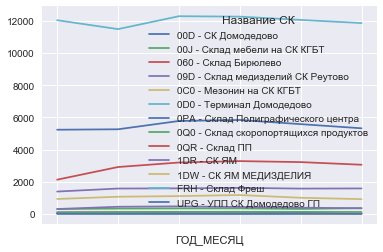

In [62]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set()

rsd.pivot_table('м3', index='ГОД_МЕСЯЦ', columns='Название СК', aggfunc='sum').plot()


# Форматы

In [63]:
pd.get_option('precision')

6

In [64]:
pd.set_option('precision', 2)
shipment

,ГОД_МЕСЯЦ,Территория,строк,м3,себ,сумма,кг
0,2017_01,Волгоград,141157,2299.40,1.00e+02,137.22,9.47e+05
1,2017_01,Екатеринбург,3831,104.79,6.89e+00,9.11,9.85e+04
2,2017_01,Казань,210919,4338.37,2.07e+02,270.59,2.05e+06
3,2017_01,Краснодар,116219,6750.89,1.27e+02,194.78,1.07e+06
4,2017_01,Москва,2696589,69249.52,2.77e+03,4426.20,1.95e+07
5,2017_01,Н.Новгород,4312,540.94,2.67e+01,29.84,4.04e+05
6,2017_01,Новосибирск,121914,2224.15,1.04e+02,139.39,1.06e+06
7,2017_01,Омск,30959,502.58,2.20e+01,29.12,2.40e+05
8,2017_01,Пермь,38747,790.78,3.79e+01,52.27,3.43e+05
9,2017_01,Ростов-Дон,559,2.52,1.25e-01,0.28,8.66e+02


In [65]:
pd.reset_option('^display')    # Сброс всех настроек Дисплея
pd.get_option('precision')

6

In [66]:
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
print('{0:,.2f}'.format(12345678))

12,345,678.00
